In [1]:
import numpy as np
from numpy.random import randint
from scipy.misc import derivative
import matplotlib.pyplot as plt

### Matrix conditioning

1. We will see that random matrix are well-conditioned.
2. We will learn how to construst a poorly conditioned matrix

In [33]:
n = 50
A = np.random.rand(n, n)
dd, W = np.linalg.eig(A)
ddn = np.sort(np.abs(dd))
print(ddn[len(ddn)-1]/ddn[0])

159.77770783195976


In [35]:
dd2 = np.insert(dd[1:], 0, complex(1e-5))
A2 = W @ np.diag(dd2) @ np.linalg.inv(W)
dd2, W2 = np.linalg.eig(A2)
ddn2 = np.sort(np.abs(dd2))
print(ddn[len(ddn2)-1]/ddn2[0])

2508228.663906928


### 1D optimization with GD

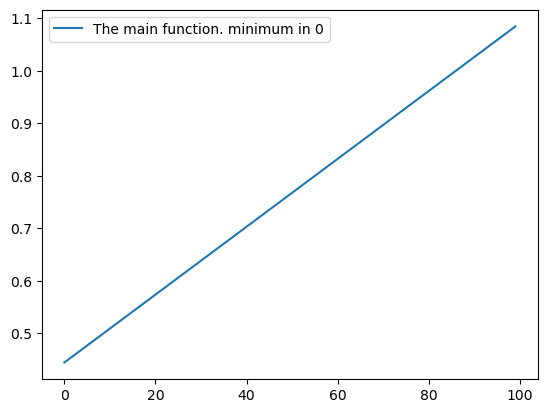

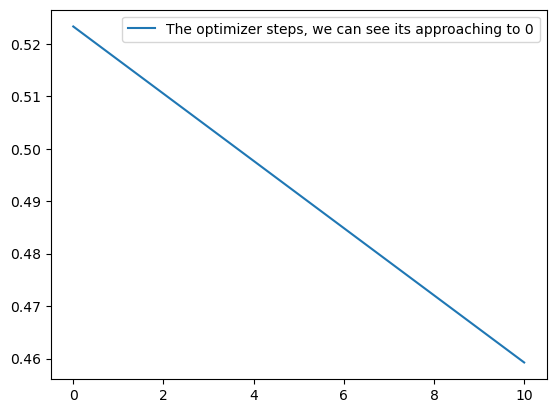

In [60]:
a, b = np.random.rand(2)
# print(a)
# print(b)
x = np.linspace(0,1,100) # create a vector
# print(x)
y = a * x + b
# print(y)

xk, eps = np.random.rand(1), 1e-2
X = [xk]
for jj in range(10):
    xk = xk - eps * a
    X.append(xk)
X = np.stack(X)

# print(X)
plt.plot(y, '',label='The main function. minimum in 0')
plt.legend()
plt.show()
plt.plot(X, '', label='The optimizer steps, we can see its approaching to 0')
plt.legend()
plt.show()


### Generate a general 1D function, and apply GD on it

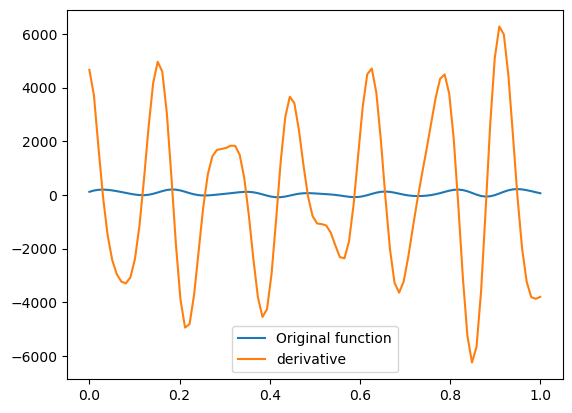

In [69]:
def ff(xx,rr):
    yy = np.zeros(xx.shape)
    for jj in range(3):
        yy = yy + rr[0,jj] * np.sin(rr[1, jj] * xx) + \
				  rr[2, jj] * np.cos(rr[3, jj] * xx)
    return yy

r = randint(0, 100, size = (4,10))
x = np.linspace(0, 1, 100)
ff2 = lambda x: ff(x,r) 

y = ff2(x)

d = np.gradient(y,x)

plt.plot(x, y, '', label='Original function')
plt.plot(x, d, '', label='derivative')
plt.legend()
plt.show()

C:\Users\tamar\AppData\Local\Temp\ipykernel_94988\1393114043.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  gk = derivative(ff2, xk, dx=eps)


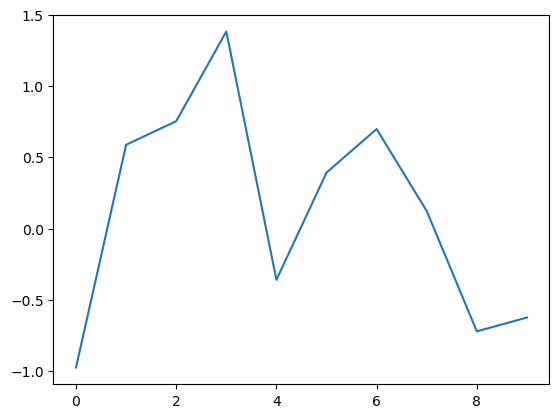

The global min.=-86.021, the local min.=-21.575


In [97]:
xk, eps, gk = np.random.rand(1), 1e-5, 1
X = [xk]
while np.abs(gk) > 0.979:
	gk = derivative(ff2, xk, dx=eps)
	xk = xk - eps * gk
	X.append(xk)

X = np.stack(X)
plt.plot(x)
plt.show()
print('The global min.={:.3f}, the local min.={:.3f}'.format(np.min(y), ff(xk, r).item()))

We explore various ways of solving the linear least squares problem: $ min_x |Ax - b|^2 $
1. gradient descent
2. Newton's method
3. analytic solve

In [89]:
# create data
np.random.seed(0)

n, k, eps = 10, 1000, 1e-2

A, b = np.random.rand(n, n), np.random.rand(n)
# print(f'A = {A}, b = {b}')

x0 = np.random.rand(n)

err_fun = lambda x: .5 * np.linalg.norm(A @ x - b) ** 2

# gradient descent
xp = x0
for jj in range(k):
	grad = (A.T @ A) @ xp - A.T @ b
	x = xp - eps * grad 
	err = err_fun(x)
	print('GD, iter {}, error = {:.3e}'.format(jj, err))

	if np.allclose(err, 1e-5):
		print(f'GD converged after {jj} iterations')

	xp = x

# Newton's method
eps = 1e-1
xp = x0
for jj in range(k):
	grad = (A.T @ A) @ xp - A.T @ b
	hessian = A.T @ A
	x = xp - eps * np.linalg.inv(hessian) @ grad
	err = err_fun(x)
	print('NM, iter {}, error = {:.3e}'.format(jj, err))

	if err < 1e-5:
		print(f'NM converged after {jj} iterations')
		break

	xp = x

# analytic solution
x = np.linalg.inv(A.T @ A) @ A.T @ b

err = err_fun(x)
print('Analytic, error = {:.3e}'.format(err))

GD, iter 0, error = 1.940e+01
GD, iter 1, error = 1.135e+01
GD, iter 2, error = 6.711e+00
GD, iter 3, error = 4.042e+00
GD, iter 4, error = 2.504e+00
GD, iter 5, error = 1.616e+00
GD, iter 6, error = 1.103e+00
GD, iter 7, error = 8.055e-01
GD, iter 8, error = 6.318e-01
GD, iter 9, error = 5.294e-01
GD, iter 10, error = 4.682e-01
GD, iter 11, error = 4.306e-01
GD, iter 12, error = 4.067e-01
GD, iter 13, error = 3.906e-01
GD, iter 14, error = 3.792e-01
GD, iter 15, error = 3.705e-01
GD, iter 16, error = 3.634e-01
GD, iter 17, error = 3.572e-01
GD, iter 18, error = 3.516e-01
GD, iter 19, error = 3.463e-01
GD, iter 20, error = 3.414e-01
GD, iter 21, error = 3.366e-01
GD, iter 22, error = 3.320e-01
GD, iter 23, error = 3.275e-01
GD, iter 24, error = 3.230e-01
GD, iter 25, error = 3.187e-01
GD, iter 26, error = 3.145e-01
GD, iter 27, error = 3.103e-01
GD, iter 28, error = 3.062e-01
GD, iter 29, error = 3.022e-01
GD, iter 30, error = 2.983e-01
GD, iter 31, error = 2.945e-01
GD, iter 32, error